In [1]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
import warnings
warnings.filterwarnings('ignore')

# hospitales

In [4]:
cdmx= pd.read_csv('/Users/rube/Documents/ironhack/proyecto final/data_covid/traslados-a-hospitales.csv')

In [5]:
cdmx

,Fecha,Alcaldia Inicio,Sector Inicio,LOCATEL,LUGAR DE TRASLADO
0,2020-03-27,MIGUEL HIDALGO,Polanco-Castillo,SI,H. PRIVADO ESPAÑOL
1,2020-03-29,BENITO JUAREZ,Narvarte-Alamos,SI,ISSSTE H. R. GRAL. IGNACIO ZARAGOZA
2,2020-03-31,IZTAPALAPA,Quetzal,SI,IMSS H. G. Z. 28 GABRIEL MANCERA
3,2020-04-03,BENITO JUAREZ,Del Valle,SI,ISSSTE CTO. MED. NAL. 20 DE NOVIEMBRE
4,2020-04-11,GUSTAVO A. MADERO,Pradera,SI,SEDESA H. G. DE LA VILLA
...,...,...,...,...,...
2020,2020-09-05,GUSTAVO A. MADERO,Pradera,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2021,2020-09-05,IZTAPALAPA,Estrella,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2022,2020-09-05,AZCAPOTZALCO,Claveria,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2023,2020-09-05,VENUSTIANO CARRANZA,Congreso,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ


In [6]:
cdmx.drop(['Alcaldia Inicio','Sector Inicio', 'LOCATEL'], inplace=True, axis=1)

In [8]:
imsscdmx = cdmx[cdmx['LUGAR DE TRASLADO'].apply(lambda x:x.startswith('IMSS'))] #seleccionó solo imss

In [9]:
#paso a fecha el indice
imsscdmx['Fecha']= pd.to_datetime(imsscdmx['Fecha'])
imsscdmx.index = pd.DatetimeIndex(imsscdmx['Fecha'])
imsscdmx.drop(['Fecha'], axis=1, inplace=True)
imsscdmx

,LUGAR DE TRASLADO
Fecha,
2020-03-31,IMSS H. G. Z. 28 GABRIEL MANCERA
2020-04-12,IMSS H. G. Z. 27 TLATELOLCO
2020-04-20,IMSS H. G. Z. 8 SAN ÁNGEL
2020-05-11,IMSS H. G. Z. 47 VICENTE GUERRERO
2020-05-12,IMSS H. G. Z. 1-A DR. RODOLFO ANTONIO DE MUCHA...
...,...
2020-09-04,IMSS H. G. Z. 1 CARLOS MAC GREGOR
2020-09-05,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2020-09-05,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ


In [10]:
#limpio columna hospitales
def limpio_h(x):
    y= x.replace('IMSS ','')
    z= y.replace('.','')
    return z.strip()

In [11]:
imsscdmx['LUGAR DE TRASLADO']= imsscdmx['LUGAR DE TRASLADO'].apply(limpio_h)

In [12]:
top10_hospitales=imsscdmx['LUGAR DE TRASLADO'].value_counts().head(10)
top10_hospitales

H G Z 47 VICENTE GUERRERO                            100
H G Z 1-A DR RODOLFO ANTONIO DE MUCHA M (VENADOS)     88
H G Z 24 INSURGENTES                                  84
H G Z 27 TLATELOLCO                                   82
H G Z 2A TRONCOSO                                     74
H G Z 8 SAN ÁNGEL                                     74
H G Z 30 IZTACALCO                                    48
H G Z 1 CARLOS MC GREGOR                              48
H G R 02 TRAUMATOLOGIA Y ORTOPEDIA VILLA COAPA        45
H G Z 29 SAN JUAN DE ARAGON                           40
Name: LUGAR DE TRASLADO, dtype: int64

In [13]:
#por hospital
imss_dia=pd.get_dummies(imsscdmx['LUGAR DE TRASLADO']).groupby(imsscdmx.index).agg(sum)
imss_mes=pd.get_dummies(imsscdmx['LUGAR DE TRASLADO']).groupby(imsscdmx.index.month).agg(sum)

In [14]:
imss_dia['Total']=imss_dia.sum(axis=1)

In [15]:
#la grafica esta en el archivo puntopy
#exporto csv
imss_dia.to_csv('/Users/rube/Documents/ironhack/proyecto final/data_limpia/imss_dia.csv')
imss_mes.to_csv('/Users/rube/Documents/ironhack/proyecto final/data_limpia/imss_mes.csv')

# Sinave

In [16]:
sinave= pd.read_csv('/Users/rube/Documents/ironhack/proyecto final/data_covid/base-covid-sinave.csv')

In [17]:
sinave_imss = sinave[sinave['sector'].apply(lambda x: x.startswith('IMSS'))]
sinave_imss

,origen,sector,cve_entidad_unidad_medica,entidad_unidad_medica,delegacion_unidad_medica,unidad_medica,fecha_de_registro,sexo,entidad_residencia,cve_entidad_residencia,...,dias_puerperio,antipireticos,unidad_cuidados_intensivos,linaje_influenza_tipo_b,viaje_1,viaje_2,viaje_3,viaje_4,viaje_5,rango_de_edad
17,USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZ 2A PASO-TRONCOSO,2020-06-10,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
20,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HES CMN SIGLO XXI,2020-07-01,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-50
30,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,UNIDAD DE MEDICINA FAMILIAR NO. 49,2020-06-17,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
44,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HPSIQ MF 10 POSTAL,2020-09-14,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
48,USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZMF 29 S. JUAN ARAGON,2020-08-19,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,81-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435802,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HINFEC CM LA RAZA,2020-04-27,MASCULINO,MEXICO,15,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-30
435821,USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZMF 8 SAN ANGEL,2020-04-05,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
435823,USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZ 27 TLATELOLCO,2020-06-16,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,51-60
435842,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,UMF 94 S.JUAN ARAGON,2020-05-11,FEMENINO,MEXICO,15,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60


In [18]:
#borro columnas que no sirven

sinave_imss.drop(['origen', 'sector', 'cve_entidad_unidad_medica','municipio_residencia',
       'entidad_unidad_medica', 'delegacion_unidad_medica', 'fecha_de_registro','entidad_residencia',
                 'localidad_residencia','clave_localidad_residencia','evolucion_caso',
       'fecha_defuncion', 'semana_defuncion','nacionalidad','es_indigena',
       'habla_lengua_indigena','fecha_inicio_sintomas','antiviral',
       'fecha_inicio_tratamiento_antiviral','contacto_aves', 'contacto_cerdos', 'contacto_animales',
                 'fecha_estimada_vacunacion', 'toma_muestra', 'laboratorio',
       'folio_laboratorio','es_migrante',
       'pais_nacionalidad', 'pais_origen', 'fecha_ingreso_pais', 'puerperio',
       'dias_puerperio', 'antipireticos', 'unidad_cuidados_intensivos',
       'linaje_influenza_tipo_b', 'viaje_1', 'viaje_2', 'viaje_3', 'viaje_4',
       'viaje_5', 'rango_de_edad'], axis=1, inplace=True)

In [19]:
sinave_imss2= sinave_imss.copy()
sinave_imss2.drop(['recibio_tratamiento_antibiotico', 'unidad_medica','contacto_infeccion_viral','intubado'], axis=1,
                 inplace=True)

In [20]:
sinave_imss2.isnull().sum()

sexo                                0
cve_entidad_residencia              0
cve_municipio_residencia            7
tipo_paciente                       0
diagnostico_clinico_neumonia        3
edad                                0
esta_emabarazada                   39
meses_embarazo                      8
ocupacion                           0
servicio_ingreso                    0
fecha_ingreso                       0
diagnostico_probable                0
fiebre                              0
tos                                 0
odinofagia                          0
disnea                              0
irritabilidad                       0
diarrea                             0
dolor_toracico                      0
calofrios                           0
cefalea                             0
mialgias                            0
artralgias                          0
ataque_al_estado_general            0
rinorrea                            0
polipnea                            0
vomito      

In [21]:
#cambio formato a fecha
#importo
import locale
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')
from datetime import datetime as dt

In [22]:
#asigno índice
sinave_imss2['fecha_ingreso']= pd.to_datetime(sinave_imss2['fecha_ingreso'])
sinave_imss2.index =sinave_imss2['fecha_ingreso']
sinave_imss2

,sexo,cve_entidad_residencia,cve_municipio_residencia,tipo_paciente,diagnostico_clinico_neumonia,edad,esta_emabarazada,meses_embarazo,ocupacion,servicio_ingreso,...,VIH_SIDA,otra_condicion,enfermedad_cardiaca,obesidad,insuficiencia_renal_cronica,tabaquismo,recibio_tratamiento,recibio_tratamiento_antiviral,vacunado,resultado_definitivo
fecha_ingreso,,,,,,,,,,,,,,,,,,,,,
2020-06-10,FEMENINO,9,7.0,AMBULATORIO,NO,35,NO,0.0,MEDICOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVO
2020-07-01,FEMENINO,9,15.0,AMBULATORIO,NO,41,NO,0.0,EMPLEADOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVO
2020-06-17,FEMENINO,9,5.0,AMBULATORIO,NO,60,NO,0.0,ENFERMERAS,CONSULTA EXTERNA,...,NO,SI,NO,NO,NO,NO,NO,NO,NO,NEGATIVO
2020-09-14,MASCULINO,9,14.0,AMBULATORIO,NO,52,NO,0.0,EMPLEADOS,CONSULTA EXTERNA,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,SARS-CoV-2
2020-08-08,FEMENINO,9,5.0,HOSPITALIZADO,NO,88,NO,0.0,HOGAR,URGENCIAS ADULTOS,...,NO,NO,NO,SI,NO,NO,NO,NO,NO,SARS-CoV-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,MASCULINO,15,70.0,AMBULATORIO,NO,25,NO,0.0,LABORATORISTAS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,SI,NO,NO,NO,SARS-CoV-2
2020-03-31,FEMENINO,9,3.0,AMBULATORIO,NO,57,NO,0.0,EMPLEADOS,CONSULTA EXTERNA,...,NO,NO,NO,NO,NO,NO,NaN,NO,SE IGNORA,NO RECIBIDA
2020-06-16,MASCULINO,9,15.0,HOSPITALIZADO,NO,57,NO,0.0,OTROS,MEDICINA INTERNA,...,NO,NO,NO,SI,NO,NO,SI,SI,NO,SARS-CoV-2


In [25]:
sinave_imss3=sinave_imss2.sort_index()
sinave_imss3

,sexo,cve_entidad_residencia,cve_municipio_residencia,tipo_paciente,diagnostico_clinico_neumonia,edad,esta_emabarazada,meses_embarazo,ocupacion,servicio_ingreso,...,VIH_SIDA,otra_condicion,enfermedad_cardiaca,obesidad,insuficiencia_renal_cronica,tabaquismo,recibio_tratamiento,recibio_tratamiento_antiviral,vacunado,resultado_definitivo
fecha_ingreso,,,,,,,,,,,,,,,,,,,,,
2020-01-02,MASCULINO,9,2.0,AMBULATORIO,NO,5,NO,0.0,ESTUDIANTES,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,NEGATIVO
2020-01-02,MASCULINO,9,5.0,AMBULATORIO,NO,8,NO,0.0,ESTUDIANTES,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,NEGATIVO
2020-01-02,FEMENINO,9,8.0,AMBULATORIO,NO,3,NO,0.0,ESTUDIANTES,OBSERVACION DE URGENCIAS,...,NO,NO,SI,NO,NO,NO,SI,SI,NO,A H3
2020-01-02,MASCULINO,9,5.0,AMBULATORIO,NO,3,NO,0.0,DESEMPLEADOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,NEGATIVO
2020-01-02,FEMENINO,9,5.0,HOSPITALIZADO,SI,29,NO,0.0,MEDICOS,URGENCIAS ADULTOS,...,NO,NO,NO,NO,NO,SI,SI,SI,NO,INF AH1N1 PMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,MASCULINO,9,14.0,HOSPITALIZADO,SI,68,NO,0.0,DESEMPLEADOS,URGENCIAS ADULTOS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN
2020-09-26,MASCULINO,9,12.0,HOSPITALIZADO,SI,35,NO,0.0,OTROS,URGENCIAS ADULTOS,...,NO,NO,NO,NO,NO,SI,NO,NO,NO,NaN
2020-09-26,FEMENINO,9,15.0,AMBULATORIO,NO,46,NO,0.0,ENFERMERAS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN


In [26]:
#lleno con cero y uno
comorbolidades = ['diagnostico_clinico_neumonia','esta_emabarazada',
    'fiebre', 'tos', 'odinofagia',
       'disnea', 'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios',
       'cefalea', 'mialgias', 'artralgias', 'ataque_al_estado_general',
       'rinorrea', 'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis',
       'cianosis', 'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma',
       'inmunosupresivo', 'hipertension', 'VIH_SIDA', 'otra_condicion',
       'enfermedad_cardiaca', 'obesidad', 'insuficiencia_renal_cronica',
       'tabaquismo', 'recibio_tratamiento', 'recibio_tratamiento_antiviral',
       'vacunado']

In [27]:
for i in comorbolidades:
    sinave_imss3[i]=np.where(sinave_imss3[i]=='SI',1,0)

In [28]:
sinave_imss3.dtypes

sexo                                     object
cve_entidad_residencia                    int64
cve_municipio_residencia                float64
tipo_paciente                            object
diagnostico_clinico_neumonia              int64
edad                                      int64
esta_emabarazada                          int64
meses_embarazo                          float64
ocupacion                                object
servicio_ingreso                         object
fecha_ingreso                    datetime64[ns]
diagnostico_probable                     object
fiebre                                    int64
tos                                       int64
odinofagia                                int64
disnea                                    int64
irritabilidad                             int64
diarrea                                   int64
dolor_toracico                            int64
calofrios                                 int64
cefalea                                 

In [29]:
sinave_imss3['Masculino']=np.where(sinave_imss3['sexo']=='Masculino',1,0)
sinave_imss3['Femenino'] = np.where(sinave_imss3['sexo']=='Femenino',1,0)
sinave_imss3['Ambulatorio']= np.where(sinave_imss3['tipo_paciente']=='AMBULATORIO',1,0)
sinave_imss3['HOSPITALIZADO']=np.where(sinave_imss3['tipo_paciente']=='HOSPITALIZADO',1,0)
sinave_imss3['tiene_covid19']=np.where(sinave_imss3['resultado_definitivo']=='SARS-CoV-2',1,0)



In [30]:
sinave_imss3['negativo_covid19']=np.where(sinave_imss3['resultado_definitivo']!='SARS-CoV-2',1,0)


In [31]:
#funcion para saber si es urgencia
def urgencias(x):
    import re
    return bool(re.search('URGENCIA',x))
    

In [32]:
import re
sinave_imss3['urgencia']=np.where(sinave_imss3['servicio_ingreso'].apply(urgencias),1,0)

In [33]:
#borrar fecha que no es indice, sexo, tipo de paciente, diagnostico probable y resultado definitivo
sinave_imss4=sinave_imss3.copy()

sinave_imss4.drop(['sexo','tipo_paciente', 'resultado_definitivo', 'diagnostico_probable', 'fecha_ingreso',
                   'servicio_ingreso', 'ocupacion'],
                 axis =1, inplace=True)


In [35]:
#exporto csv 
sinave_imss4.to_csv('/Users/rube/Documents/ironhack/proyecto final/data_limpia/sinave_total.csv')

In [36]:
#agrupo por fecha
sinave_imss5= sinave_imss4.groupby(sinave_imss4.index).agg('sum')

In [37]:
#borro columnas categoricas
sinave_imss5.drop(['cve_entidad_residencia', 'cve_municipio_residencia','edad','meses_embarazo'],axis =1, inplace=True)

In [38]:
#series de tiempo importo
import statsmodels.api as sm
import matplotlib.pyplot as plt

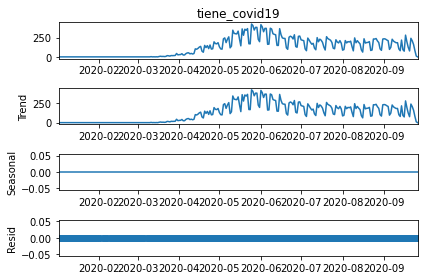

In [39]:
res = sm.tsa.seasonal_decompose(sinave_imss5['tiene_covid19'], freq=1)
resplot = res.plot()

In [40]:
#hago prueba de adfuller
from statsmodels.tsa.stattools import adfuller

In [41]:
adfuller(sinave_imss5['tiene_covid19']['2020-04-01':]) #no es estacionario :|

(-1.5304219079347425,
 0.5184119941304541,
 14,
 164,
 {'1%': -3.47086589632514, '5%': -2.879330279087651, '10%': -2.57625492712671},
 1683.161424454352)

In [42]:
#agrego mes
import datetime
sinave_imss5['mes']=sinave_imss5.index.month


In [43]:
#exporto csv

#sinave_imss5.to_csv('/Users/rube/Documents/ironhack/proyecto final/data_limpia/sinave_imss_sept.csv')